In [1]:
from utils import *
from numpy.fft import fftshift, fft2, ifft2, ifftshift

In [2]:
def scaleSpectrum(A):
    return np.real(np.log10(np.absolute(A) + np.ones(A.shape)))

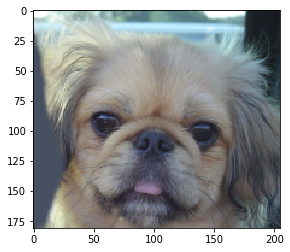

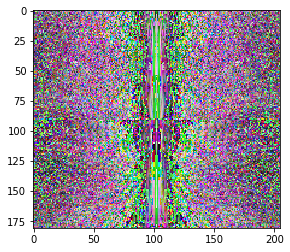

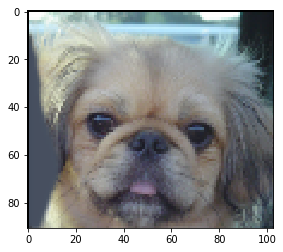

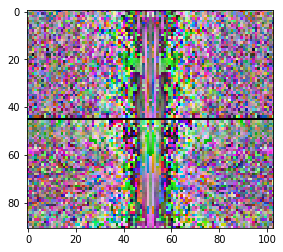

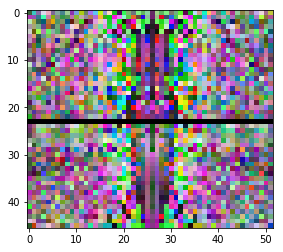

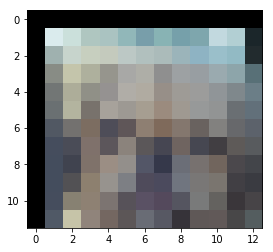

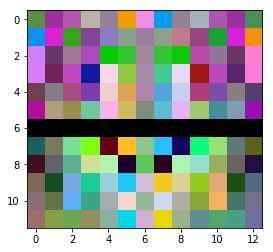

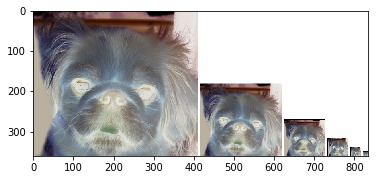

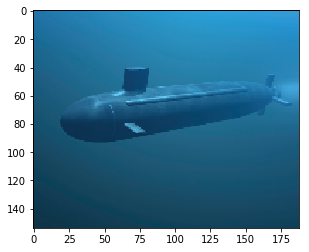

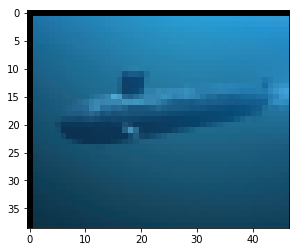

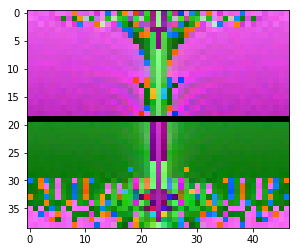

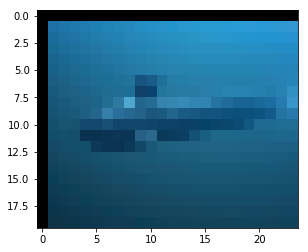

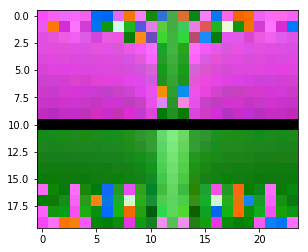

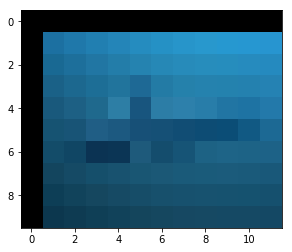

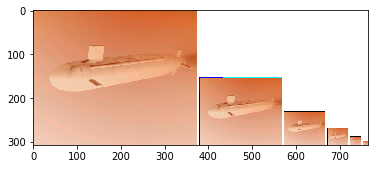

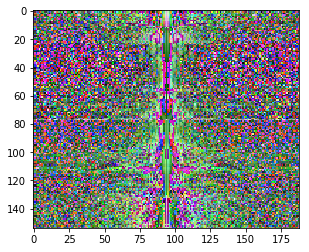

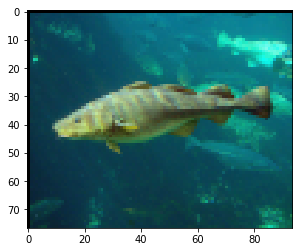

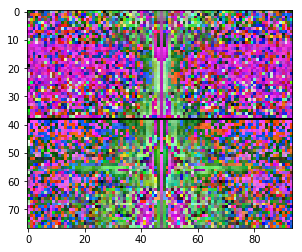

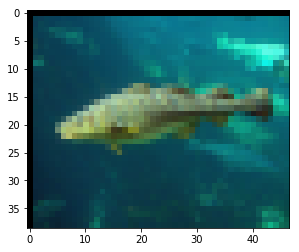

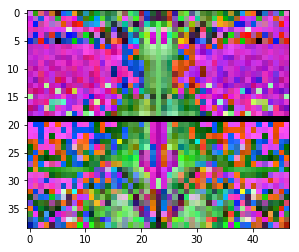

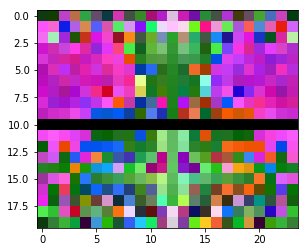

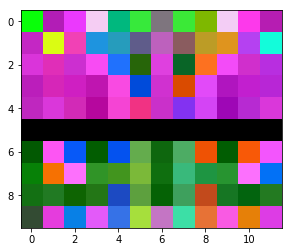

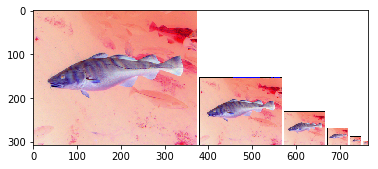

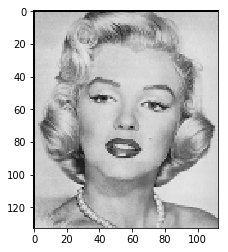

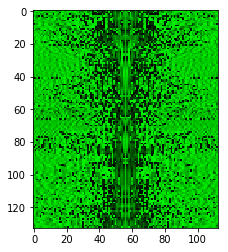

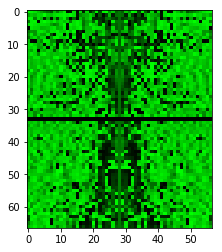

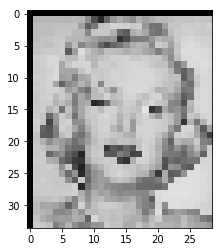

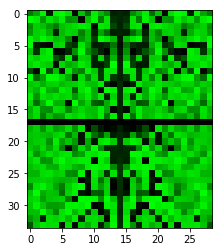

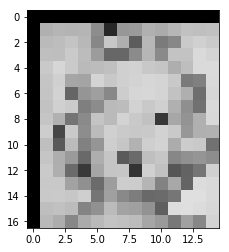

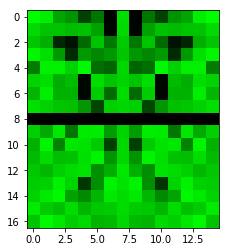

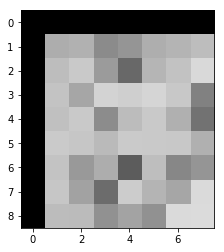

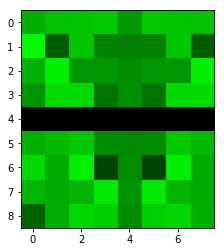

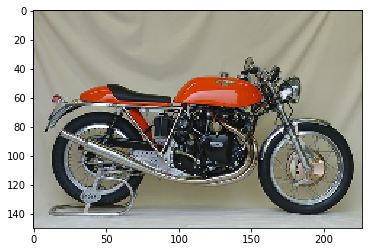

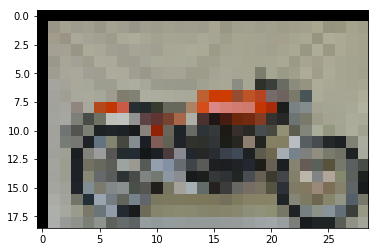

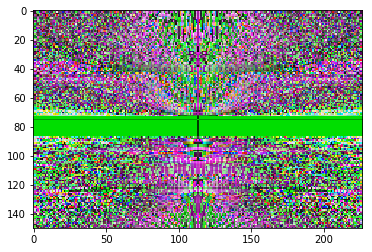

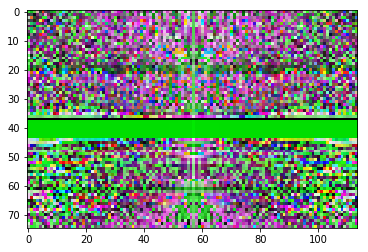

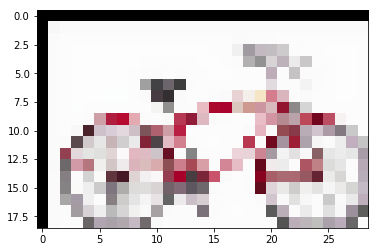

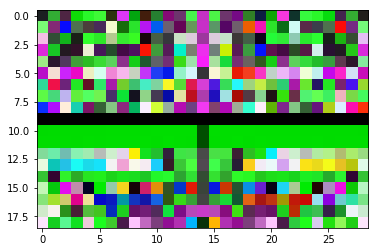

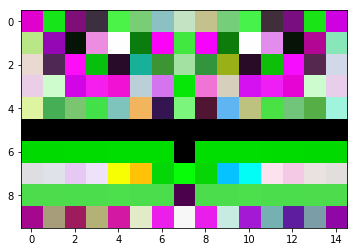

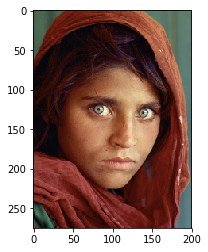

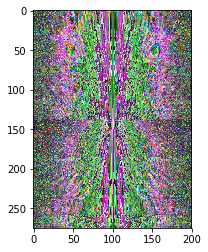

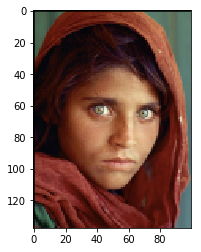

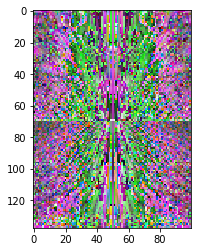

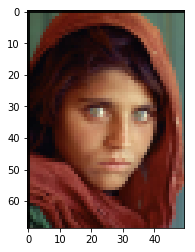

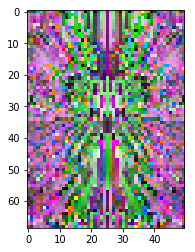

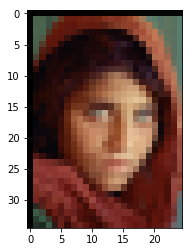

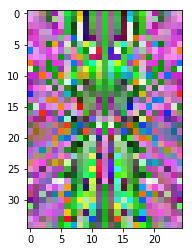

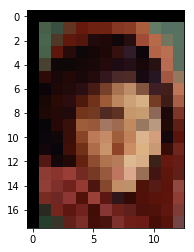

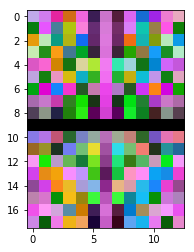

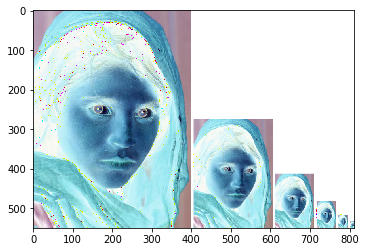

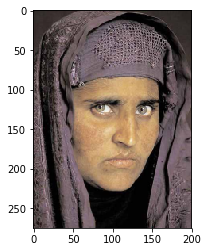

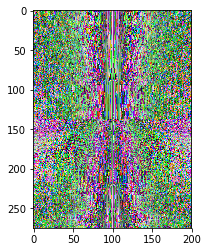

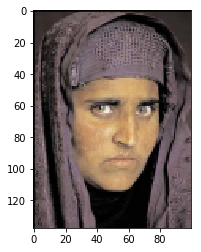

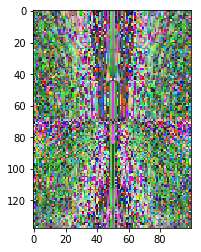

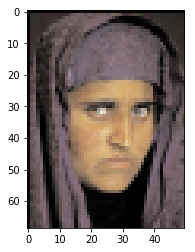

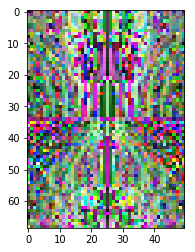

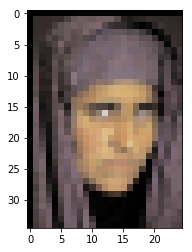

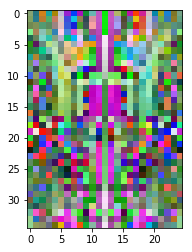

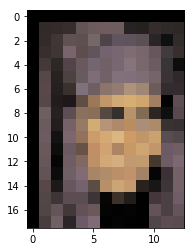

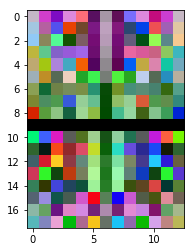

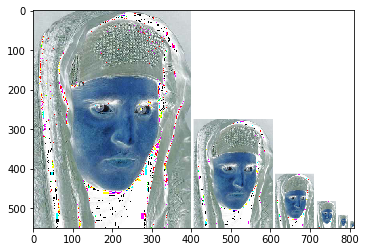

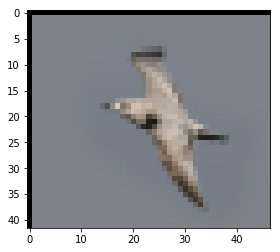

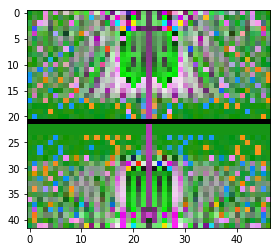

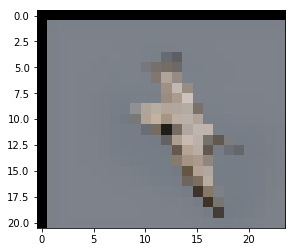

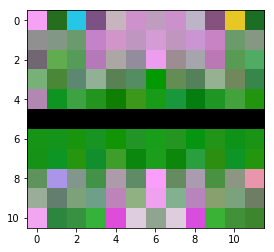

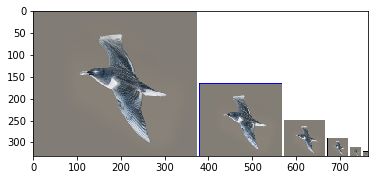

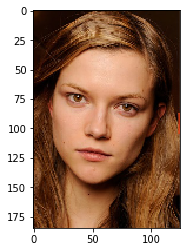

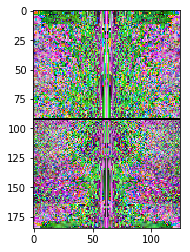

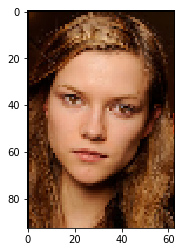

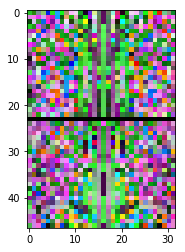

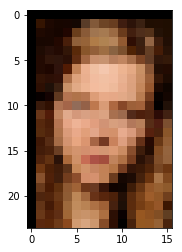

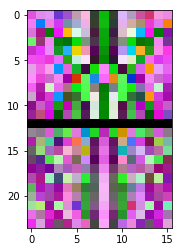

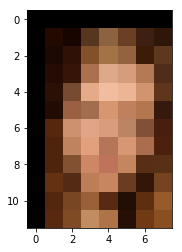

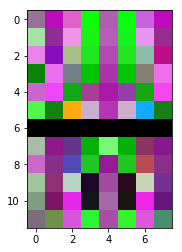

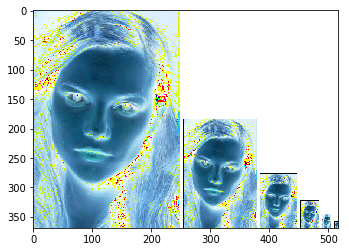

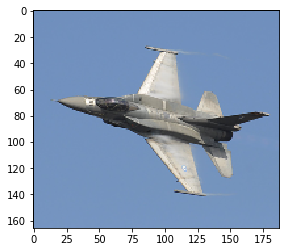

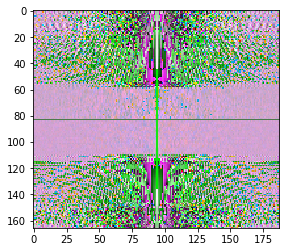

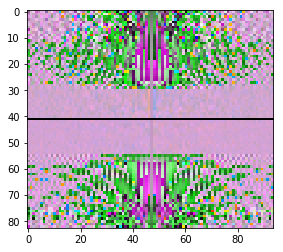

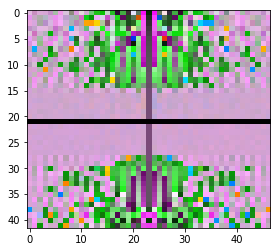

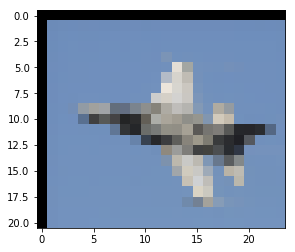

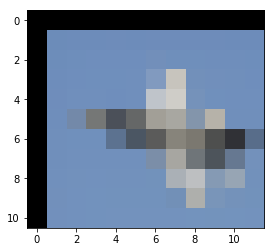

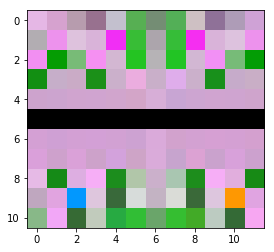

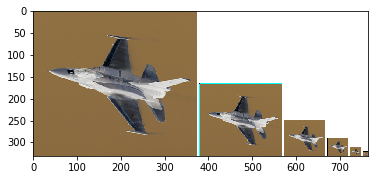

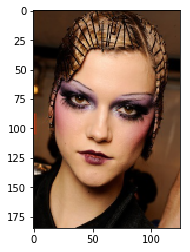

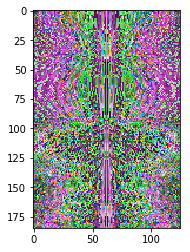

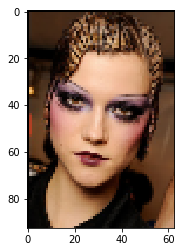

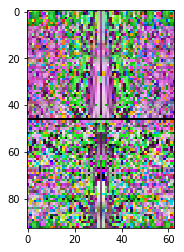

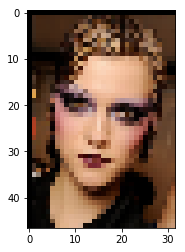

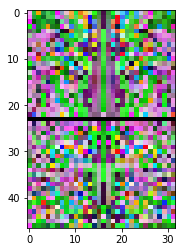

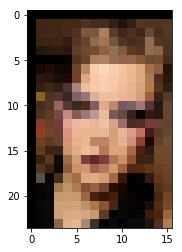

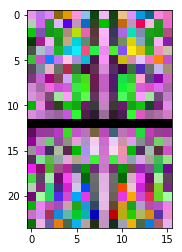

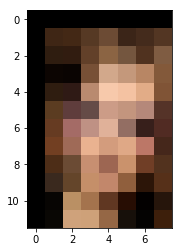

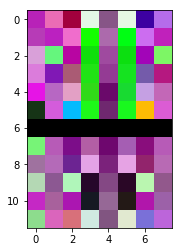

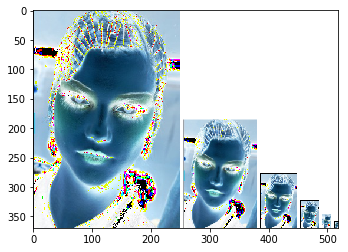

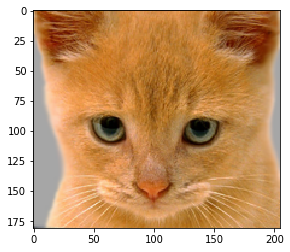

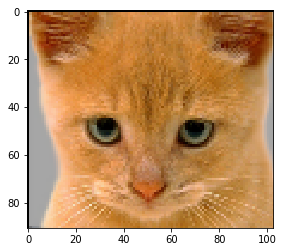

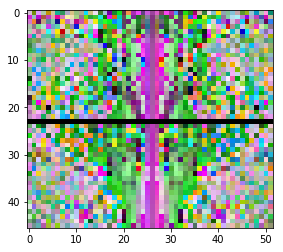

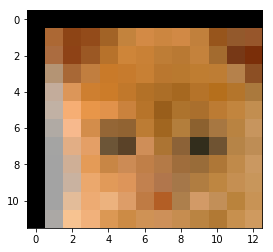

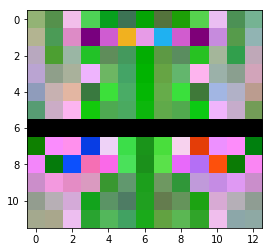

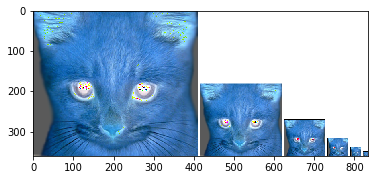

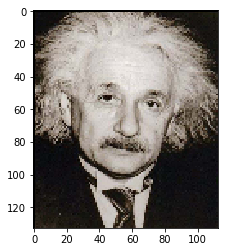

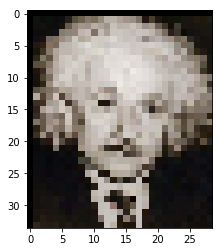

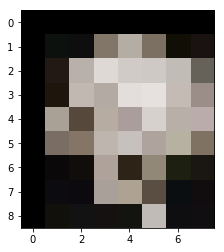

In [4]:
images = glob.glob('./data/*')

for idx, fname in enumerate(images):
    #img = ndimage.imread(fname,flatten=True)
    img = ndimage.imread(fname)
    original_height = img.shape[0]
    output = img.copy()
    output_fft = fftshift(fft2(img))
    for i in range(5):
        # make a gaussian filter
        gaussian_filter = gauss2D_norm(shape=(img.shape[1],img.shape[1]),sigma=2/(2*3.14))
        img = my_imfilter(img, gaussian_filter)[::2,::2, :]
        plt.imshow(img)
        plt.show()
        
        output = np.concatenate((output, np.ones((original_height, 5, 3))), axis=1)
        tmp = np.concatenate((np.ones((original_height-img.shape[0],img.shape[1],3)), img), axis=0)
        output = np.concatenate((output,tmp), axis=1)
        
        shifted_img = fftshift(fft2(img))
        plt.imshow(scaleSpectrum(shifted_img))
        plt.show()
        
        output_fft = np.concatenate((output_fft, np.ones((original_height, 5, 3))), axis=1)
        tmp_fft = np.concatenate((np.ones((original_height-shifted_img.shape[0],shifted_img.shape[1],3)), shifted_img), axis=0)
        output_fft = np.concatenate((output_fft,tmp_fft), axis=1)
        
    plt.imshow(output)
    misc.imsave("./image_pyramid/pyramid_{}.png".format(fname.split('/')[2].split('.')[0]), np.real(output))
    plt.show()
    misc.imsave("./image_pyramid/dft_{}.png".format(fname.split('/')[2].split('.')[0]), scaleSpectrum(output_fft))

In [33]:
misc.imsave("dft.png", scaleSpectrum(shifted_img))

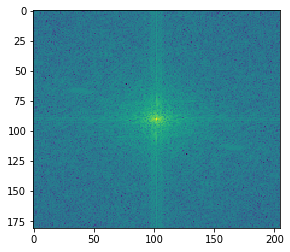

In [34]:
plt.imshow(scaleSpectrum(shifted_img))
plt.show()